Analyzing Credit Card Defaulters

Importing Libraries & Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_excel('./creditCard.xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Basic Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Data Preprocessing

Checking For Unique Values In Categorical Columns

In [8]:
print("Unique Values in Sex Column: ", str(sorted(df['SEX'].unique())))

Unique Values in Sex Column:  [1, 2]


In [9]:
print("Unique Values in Education Column: ", str(sorted(df['EDUCATION'].unique())))

Unique Values in Education Column:  [0, 1, 2, 3, 4, 5, 6]


In [11]:
print("Unique Values in Marriage Column: ", str(sorted(df['MARRIAGE'].unique())))

Unique Values in Marriage Column:  [0, 1, 2, 3]


In [12]:
print("Unique Values in Pay_0 Column: ", str(sorted(df['PAY_0'].unique())))

Unique Values in Pay_0 Column:  [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [13]:
print("Unique Values in Default Payment Next Month Column: ", str(sorted(df['default payment next month'].unique())))

Unique Values in Default Payment Next Month Column:  [0, 1]


The education column has 7 unique values, but data description file shows only till 4, so we will include 0,5,6 into 4

In [15]:
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4

In [16]:
print("Unique Values in Education Column after processing: ", str(sorted(df['EDUCATION'].unique())))

Unique Values in Education Column after processing:  [1, 2, 3, 4]


The marriage column has 4 unique values, but data description file shows it should have only 3 columns, so we will combine category 0 with 2

In [17]:
fill = (df.MARRIAGE == 0)

df.loc[fill, 'MARRIAGE'] = 2

In [18]:
print("Unique Values in Marriage Column after processing: ", str(sorted(df['MARRIAGE'].unique())))

Unique Values in Marriage Column after processing:  [1, 2, 3]


Renaming Columns 

In [19]:
df = df.rename(columns={'default payment next month': 'DEFAULT', 'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Exploratory Data Analysis

Univariate Analysis

<AxesSubplot:xlabel='DEFAULT', ylabel='count'>

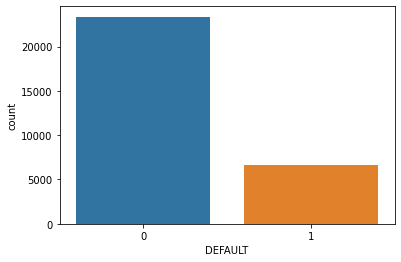

In [20]:
sns.countplot(x='DEFAULT', data=df)

In [21]:
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

Out of the 30,000 customers, only 6636 people, 22% have defaulted

<AxesSubplot:xlabel='SEX', ylabel='count'>

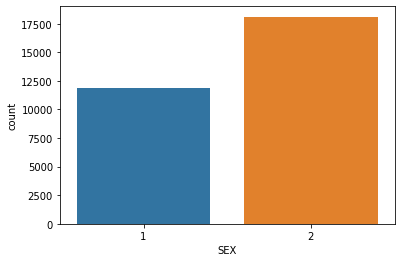

In [22]:
sns.countplot(x='SEX', data=df)

In [23]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

The data set contains 11888 males, and 18112 females

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

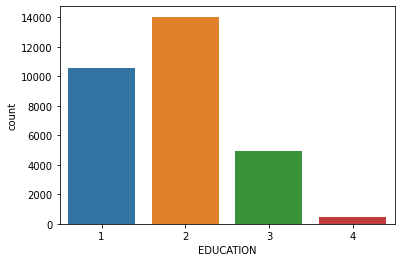

In [24]:
sns.countplot(data=df, x='EDUCATION')

In [25]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Most customers have attended a graduate school or university

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

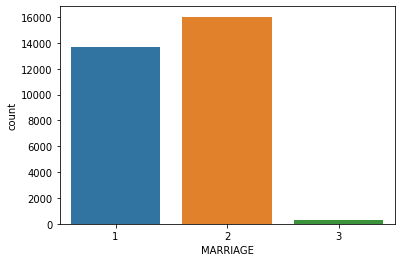

In [26]:
sns.countplot(x='MARRIAGE', data=df)

In [27]:
df['MARRIAGE'].value_counts()

2    16018
1    13659
3      323
Name: MARRIAGE, dtype: int64

The dataset contains high number of single customers, 16018

Bivariate Analysis

<AxesSubplot:xlabel='SEX', ylabel='count'>

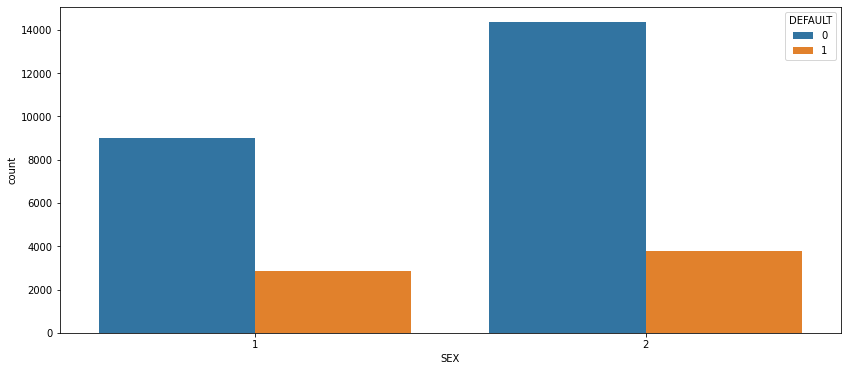

In [30]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='SEX', hue='DEFAULT')

In [31]:
pd.crosstab(df.SEX,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
SEX,,
1,0.758328,0.241672
2,0.792237,0.207763
All,0.778800,0.221200


24% Male customers have defaulted, compared to 20% in females

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

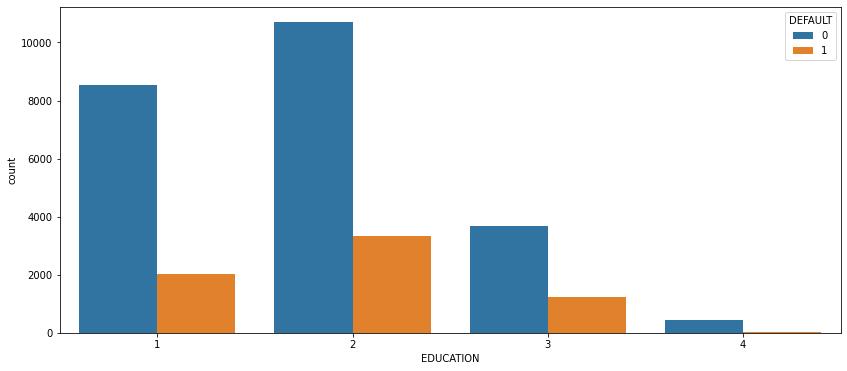

In [32]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='EDUCATION', hue='DEFAULT')

In [33]:
pd.crosstab(df.EDUCATION,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
EDUCATION,,
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.929487,0.070513
All,0.778800,0.221200


People with University Education default the most at 25.15%

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

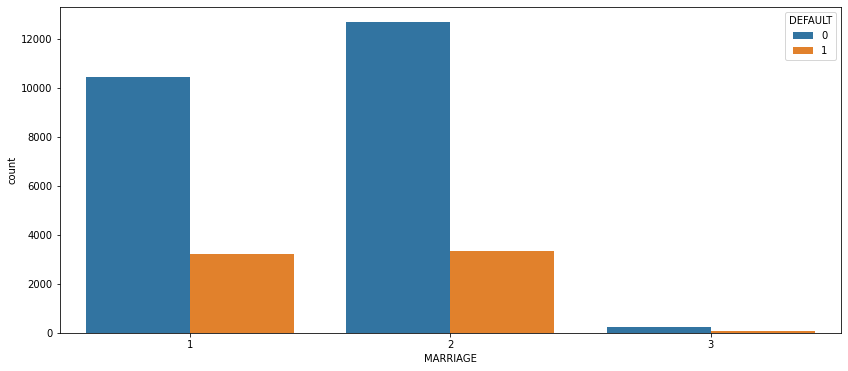

In [35]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='MARRIAGE', hue='DEFAULT')

In [36]:
pd.crosstab(df.MARRIAGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
MARRIAGE,,
1,0.765283,0.234717
2,0.791110,0.208890
3,0.739938,0.260062
All,0.778800,0.221200


Single and married customers have close default rates of 20% and 23% respectively. While customers with other marriage status have highest default rate of 26%

<table>
<thead>
<th>Measurement Scale</th>
<th>Description</th>
<tr>
<td>-1</td>
<td>Paid on time</td>
</tr>
<tr>
<td>1</td>
<td>Payment delay for 1 month</td>
</tr>

<tr>
<td>2</td>
<td>Payment delay for 2 months</td>
</tr>

<tr>
<td>3</td>
<td>Payment delay for 3 months</td>
</tr>

<tr>
<td>4</td>
<td>Payment delay for 4 months</td>
</tr>

<tr>
<td>5</td>
<td>Payment delay for 5 months</td>
</tr>

<tr>
<td>6</td>
<td>Payment delay for 6 months</td>
</tr>

<tr>
<td>7</td>
<td>Payment delay for 8 months</td>
</tr>

<tr>
<td>9</td>
<td>Payment delay for 9 months and above</td>
</tr>
</thead>
</table>

In [37]:
pd.crosstab(df.PAY_1,df.DEFAULT,margins=True)

DEFAULT,0,1,All
PAY_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


Balance Vs Default

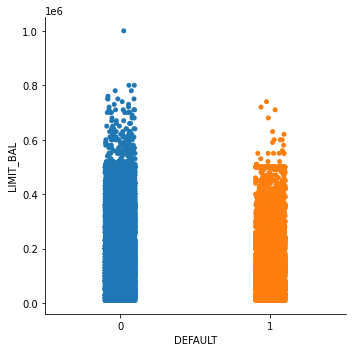

In [38]:
sns.catplot(x="DEFAULT", y="LIMIT_BAL", jitter=True, data=df);

This shows customers with higher balances hardly ever default, and customers with lower balances default more

Age vs Default

In [39]:
pd.crosstab(df.AGE,df.DEFAULT)

DEFAULT,0,1
AGE,,
21,53,14
22,391,169
23,684,247
24,827,300
25,884,302
26,1003,253
27,1164,313
28,1123,286
29,1292,313


Ages 27 & 29 have the highest number of defaulters

In [40]:
pd.crosstab(df.AGE,df.DEFAULT, normalize='index', margins=True)

DEFAULT,0,1
AGE,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


Finding Correlations

<AxesSubplot:>

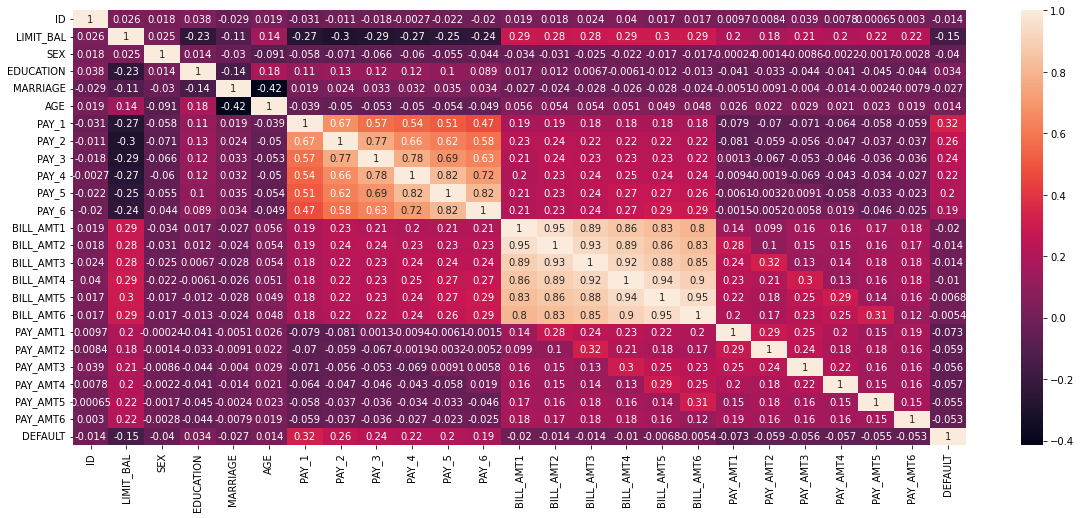

In [44]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)

<h1>How does a high risk customer look?</h1>

A customer that satisfies all or most of the below conditions can be a high risk customer.
<ul>
<li>A customer is a male, as male customers' default rate is 24% which is more than female customers.</li>
<li>A customer with relationship status of others has default rate of 26%, and is more likely to default rather than customers who are married or single.</li>
<li>A customer who has delayed payments for more than 2 consecutive months, has higher chances of defaulting on his credit card.</li>
<li>A customer with who is aged 22 has higher probability of defaulting on payments than any other age.</li>
</ul>